In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats as ss
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
import scipy.stats 

from sklearn.metrics import accuracy_score


import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# Load the data. 
white_wine = pd.read_csv('winequality-white.csv', sep=",")
red_wine = pd.read_csv('winequality-red.csv', sep=",")

In [3]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


[Text(0.5, 1.0, 'Red wine')]

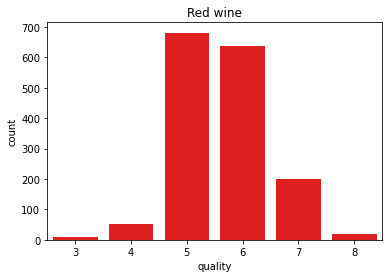

In [5]:
sns.countplot(data=red_wine, x="quality", color = 'red').set(title= "Red wine")

In [6]:
red_wine["quality"].value_counts(dropna=False, sort=True)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
ratings = [
    (red_wine['quality'] >= 7),
    (red_wine['quality'] <= 4)
]
quality = ['good', 'bad']
red_wine['quality'] = np.select(ratings, quality, default='average')
red_wine.quality.value_counts()

average    1319
good        217
bad          63
Name: quality, dtype: int64

[Text(0.5, 1.0, 'White wine')]

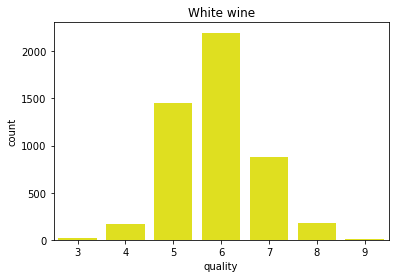

In [8]:
sns.countplot(data=white_wine, x="quality",  color = 'yellow').set(title= "White wine")

In [9]:
white_wine["quality"].value_counts(dropna=False, sort=True)

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [10]:
ratings = [
    (white_wine['quality'] >= 7),
    (white_wine['quality'] <= 4)
]
quality = ['good', 'bad']
white_wine['quality'] = np.select(ratings, quality, default='average')
white_wine.quality.value_counts()

average    3655
good       1060
bad         183
Name: quality, dtype: int64

In [11]:
dfo=red_wine.select_dtypes(include=['object']) # select object type columns
red_wine = pd.concat([red_wine.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

In [12]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_average,quality_bad,quality_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0,0


In [21]:
# We do the test train split here
X = red_wine.drop(["quality_good"], axis = 1)
y = red_wine['quality_good']

In [22]:
red_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_average,quality_bad,quality_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0,0


In [23]:
from sklearn.feature_selection import  SelectKBest
from sklearn.feature_selection import  chi2

#apply SelectKBest class to extract top 10 best features
best_features = SelectKBest(score_func = chi2, k = 9)
fit = best_features.fit(X, y)
kept_features = pd.DataFrame({'columns':X.columns,
                              'Kept': best_features.get_support()})
kept_features

,columns,Kept
0,fixed acidity,True
1,volatile acidity,True
2,citric acid,True
3,residual sugar,True
4,chlorides,False
5,free sulfur dioxide,True
6,total sulfur dioxide,True
7,density,False
8,pH,False
9,sulphates,False


In [24]:
red_wine = red_wine.drop(labels=['density', 'residual sugar', 'chlorides', 'pH'], axis=1)
red_wine.head()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality_average,quality_bad,quality_good
0,7.4,0.70,0.00,11.0,34.0,0.56,9.4,1,0,0
1,7.8,0.88,0.00,25.0,67.0,0.68,9.8,1,0,0
2,7.8,0.76,0.04,15.0,54.0,0.65,9.8,1,0,0
3,11.2,0.28,0.56,17.0,60.0,0.58,9.8,1,0,0
4,7.4,0.70,0.00,11.0,34.0,0.56,9.4,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022, stratify=y)

In [ ]:
#scale
sc = StandardScaler()
x_training_data = sc.fit_transform(x_training_data)
x_test_data = sc.fit_transform(x_test_data)

In [ ]:
from sklearn.dummy import DummyClassifier
red_dummy_classifier = DummyClassifier(strategy='most_frequent',random_state=2022)
red_dummy_classifier.fit(X_train,y_train)
red_dummy_score = red_dummy_classifier.score(X_test,y_test)
print("Dummy Score = ", red_dummy_score)

In [ ]:
# We do the test train split here
X = red_wine.drop(["quality_good", "quality_bad", "quality_average"], axis = 1)
y = red_wine['quality_good']

In [ ]:
y.value_counts()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022, stratify=y)
white_dummy_classifier = DummyClassifier(strategy='most_frequent',random_state=2022)
white_dummy_classifier.fit(X_train,y_train)
white_dummy_score = white_dummy_classifier.score(X_test,y_test)
print("Dummy Score = ", white_dummy_score)